In [1]:
# Importing python packages 
import numpy as np  # numpy!
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation!
import pandas as pd # dataframes & data analysis!
## need this for train test split 
from sklearn.model_selection import train_test_split

## need a modeling library (statsmodels) 
import statsmodels.api as sm
import statsmodels.tools
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [188]:
# Importing the data 
dataset = 'Life Expectancy Data.csv'
df = pd.read_csv(dataset)

In [363]:
pd.reset_option('display.max_rows', 50)
df.head()


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [7]:
df.columns #No income composition, total expenditure and percentage expenditure column, measles in percentage

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [228]:
df.describe()

/Users/egleduobaite/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,GDP_ex,GDP_log
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,...,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2.864000e+03,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,...,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075,inf,8.399358
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,...,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608,NaN,1.444216
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,...,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000,1.886181e+64,4.997212
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,...,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000,NaN,7.255415
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,...,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000,NaN,8.346879
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,...,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000,NaN,9.438033
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,...,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000,inf,11.629979


In [230]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy', 'GDP_ex', 'GDP_log'],
      dtype='object')

In [7]:
df_scale = df[['Adult_mortality', 'Schooling', 'Incidents_HIV', 'Under_five_deaths', 'BMI', 'Infant_deaths', 'Measles']]

In [365]:
df['Adult_mortality'].describe()

count    2864.000000
mean      192.251775
std       114.910281
min        49.384000
25%       106.910250
50%       163.841500
75%       246.791375
max       719.360500
Name: Adult_mortality, dtype: float64

In [408]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy',
       'Adult_mortality_scaled', 'Schooling_scaled', 'GDP_ex', 'GDP_log'],
      dtype='object')

In [236]:
# Z = StandardScaler() ## Initial scaler
# Z.fit(df_scale) ## Fit the data

# ## Transform the data according to the scaler
# ## Save it as a new dataframe called df_scale_z
# df_scale_z = Z.transform(df_scale)

In [121]:
df_scale1 = df[['BMI']]

In [96]:
minmax = MinMaxScaler() ## Initialise scaler
minmax.fit(df_scale1) ## Fit the scaler

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_minmax
df_scale_n = minmax.transform(df_scale1)

In [8]:
df_scale = df[['Adult_mortality', 'Schooling', 'BMI']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z = Z.transform(df_scale)

df_scaled_z = pd.DataFrame(df_scale_z, columns = ['Adult_mortality', 'Schooling','BMI'])
df['Adult_mortality_scaled'] = df_scaled_z['Adult_mortality']
df['Schooling_scaled'] = df_scaled_z['Schooling']
df['BMI_scaled'] = df_scaled_z['BMI']

In [251]:
# df_scaled_z = pd.DataFrame(df_scale_z, columns = ['Infant_deaths', 'Under_five_deaths',
#        'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
#        'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
#        'Population_mln', 'Thinness_ten_nineteen_years',
#        'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
#        'Economy_status_Developing', 'Life_expectancy'])

In [6]:
df_scaled_z = pd.DataFrame(df_scale_z, columns = ['Adult_mortality', 'Schooling', 'Incidents_HIV', 'Under_five_deaths', 'BMI', 'Infant_deaths', 'Measles'])

ValueError: Shape of passed values is (2864, 3), indices imply (2864, 7)

In [98]:
df_scaled_n = pd.DataFrame(df_scale_n, columns = ['BMI'])

In [ ]:
df['Adult_mortality_scaled'] = df_scaled_z['Adult_mortality']

In [125]:
df['Schooling_scaled'] = df_scaled_z['Schooling']

In [51]:
df['Incidents_HIV_scaled'] = df_scaled_z['Incidents_HIV']

In [481]:
df['Under_five_deaths_scaled'] = df_scaled_z['Under_five_deaths']

In [126]:
df['BMI_scaled'] = df_scaled_n['BMI']

In [127]:
df['BMI_scaled'] = df_scaled_z['BMI']

In [611]:
df['Infant_deaths_scaled'] = df_scaled_z['Infant_deaths']

In [52]:
df['Measles_scaled'] = df_scaled_z['Measles']

In [374]:
df_scaled_z['Adult_mortality'].describe()

count    2.864000e+03
mean     5.202232e-17
std      1.000175e+00
min     -1.243516e+00
25%     -7.428093e-01
50%     -2.472819e-01
75%      4.747106e-01
max      4.587934e+00
Name: Adult_mortality, dtype: float64

In [189]:
feature_cols = list(df.columns) ##select all columns 
feature_cols.remove('Life_expectancy')

In [190]:
X = df[feature_cols] ## dataframe holding all features 
y = df['Life_expectancy'] ##target looking to predict 

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, ##features 
                                                    y, ##targets 
                                                    test_size = 0.2,## %allocated to the test
                                                    random_state = 84)## want the same train set each time 

In [ ]:
#84

In [141]:
df_scale_z_train

array([[-0.66068154, -0.35825462, -0.73920275],
       [-1.15615579,  0.16821192,  0.45793921],
       [-0.18891231,  0.36563688,  1.33634526],
       ...,
       [-0.44832296,  0.76048678,  1.07282344],
       [ 3.45755307,  0.1024036 ,  0.3700986 ],
       [ 0.62747904, -1.54280435, -1.19647585]])

In [192]:
df_scale_train = X_train[['Adult_mortality']]
df_scale_test = X_test[['Adult_mortality']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Adult_mortality_scaled'] = df_scale_z_train
X_test['Adult_mortality_scaled'] = df_scale_z_test


In [193]:
df_scale_train = X_train[['Polio']]
df_scale_test = X_test[['Polio']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Polio_scaled'] = df_scale_z_train
X_test['Polio_scaled'] = df_scale_z_test


In [194]:
df_scale_train = X_train[['Alcohol_consumption']]
df_scale_test = X_test[['Alcohol_consumption']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Alcohol_consumption_scaled'] = df_scale_z_train
X_test['Alcohol_consumption_scaled'] = df_scale_z_test


In [195]:
df_scale_train = X_train[['Hepatitis_B']]
df_scale_test = X_test[['Hepatitis_B']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Hepatitis_B_scaled'] = df_scale_z_train
X_test['Hepatitis_B_scaled'] = df_scale_z_test


In [196]:
df_scale_train = X_train[['Incidents_HIV']]
df_scale_test = X_test[['Incidents_HIV']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Incidents_HIV_scaled'] = df_scale_z_train
X_test['Incidents_HIV_scaled'] = df_scale_z_test


In [197]:
df_scale_train = X_train[['Under_five_deaths']]
df_scale_test = X_test[['Under_five_deaths']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Under_five_deaths_scaled'] = df_scale_z_train
X_test['Under_five_deaths_scaled'] = df_scale_z_test

In [83]:
df_scaled_z_test.isnull().sum()

Adult_mortality    0
dtype: int64

In [86]:
df_scaled_z_test.head(20)

,Adult_mortality
0,-0.963667
1,1.045363
2,2.621204
3,-0.157761
4,-0.191359
5,0.543519
6,-0.109595
7,-0.985746
8,-0.248675
9,0.652647


In [98]:
X_test['Adult_mortality_scaled'].head(20)

2584   -1.001231
956     1.038541
508     2.638494
1548   -0.182993
2591   -0.217105
1184    0.529018
2123   -0.134090
1190   -1.023648
817    -0.275298
2772    0.639816
1519   -1.020627
1218   -1.170719
326    -0.967363
1525    0.164939
935    -0.369874
1484   -0.731220
2334   -1.189011
1182   -1.010359
1318   -0.381054
781     0.524360
Name: Adult_mortality_scaled, dtype: float64

In [70]:
df_scaled_z_test.shape

(573, 1)

In [82]:
X_test['Adult_mortality_scaled'].isnull().sum()

470

In [99]:
X_train['Adult_mortality_scaled'].isnull().sum()

0

In [91]:
X_

445

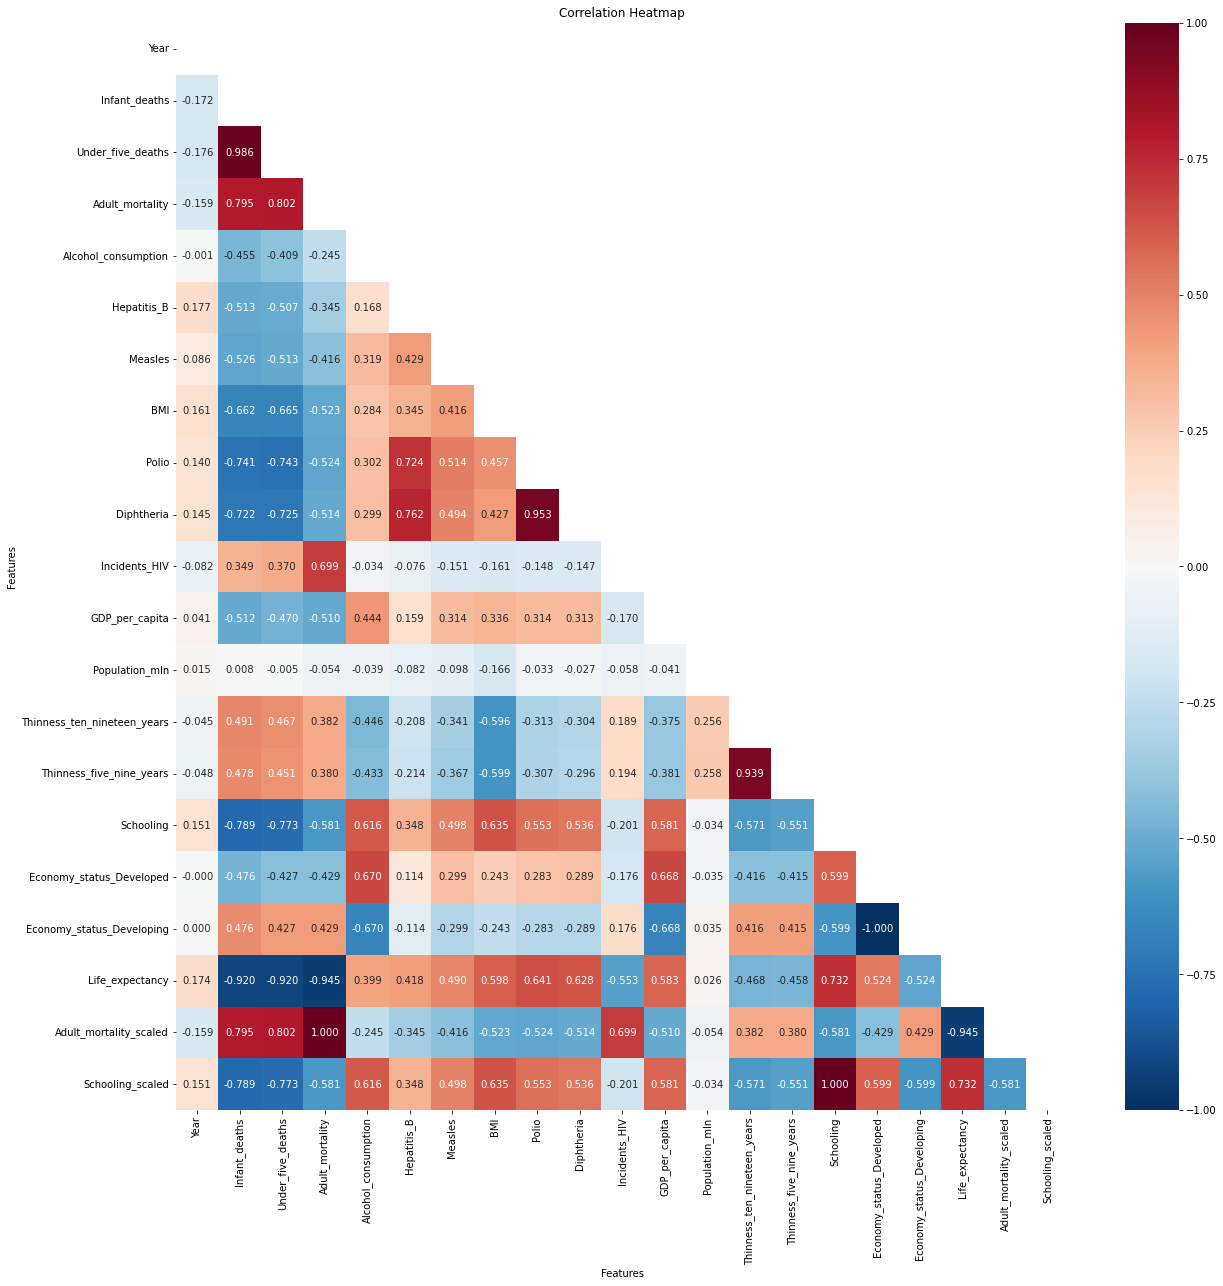

In [316]:
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(df.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(df.corr()))

# Add a title and axis labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

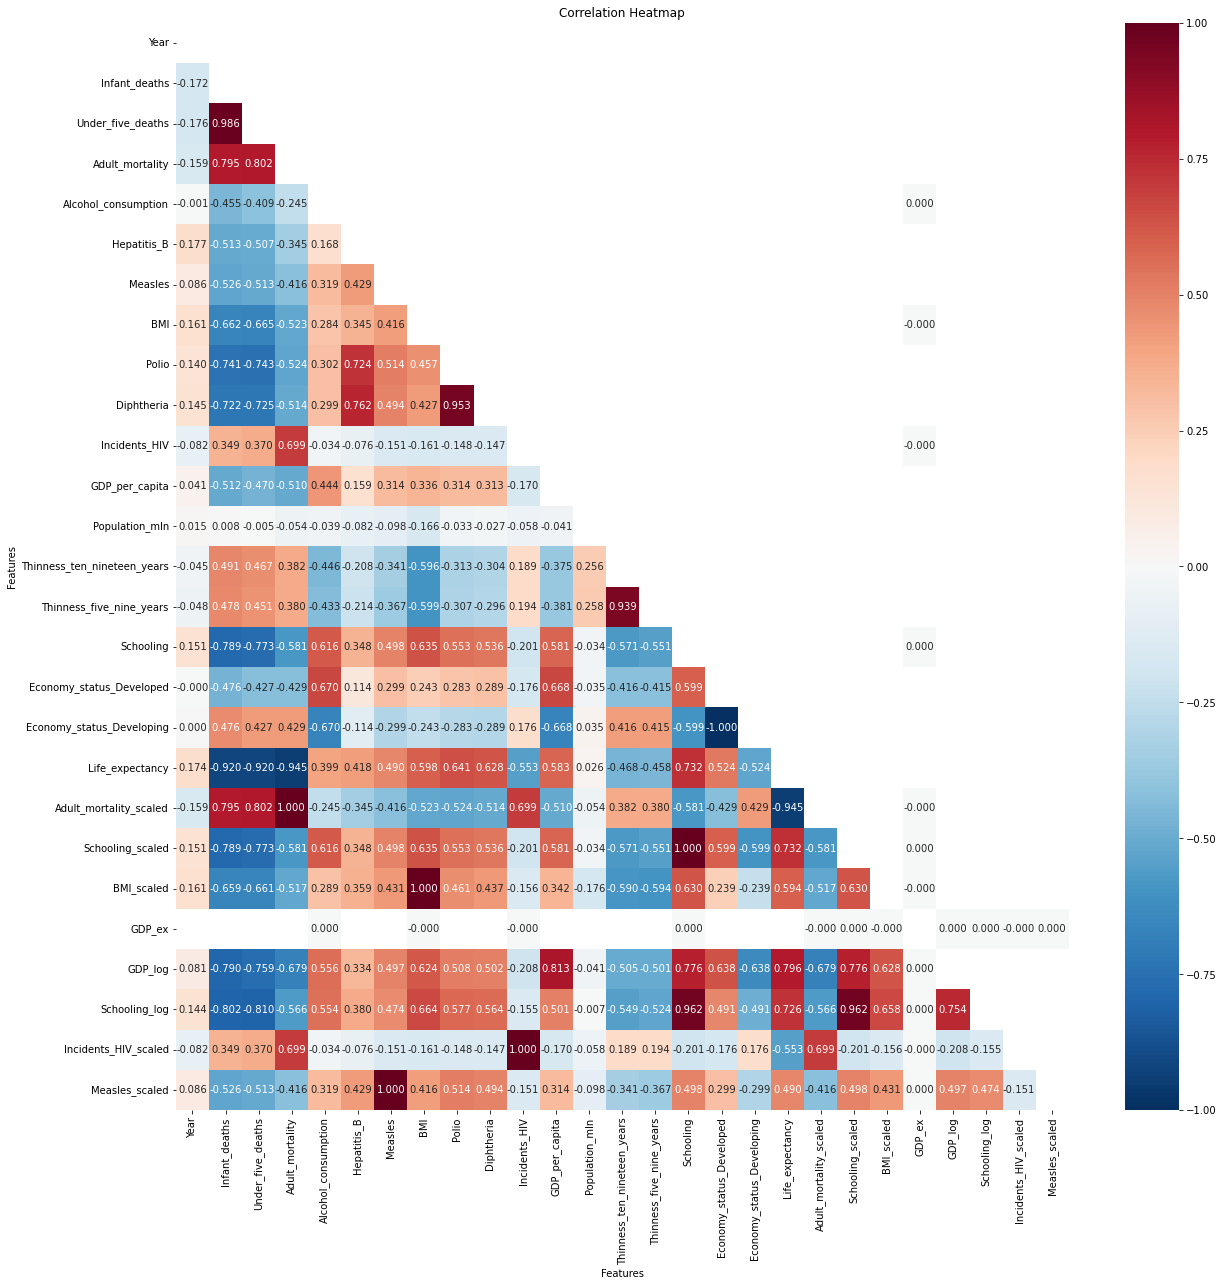

In [109]:
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(df.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(df.corr()))

# Add a title and axis labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

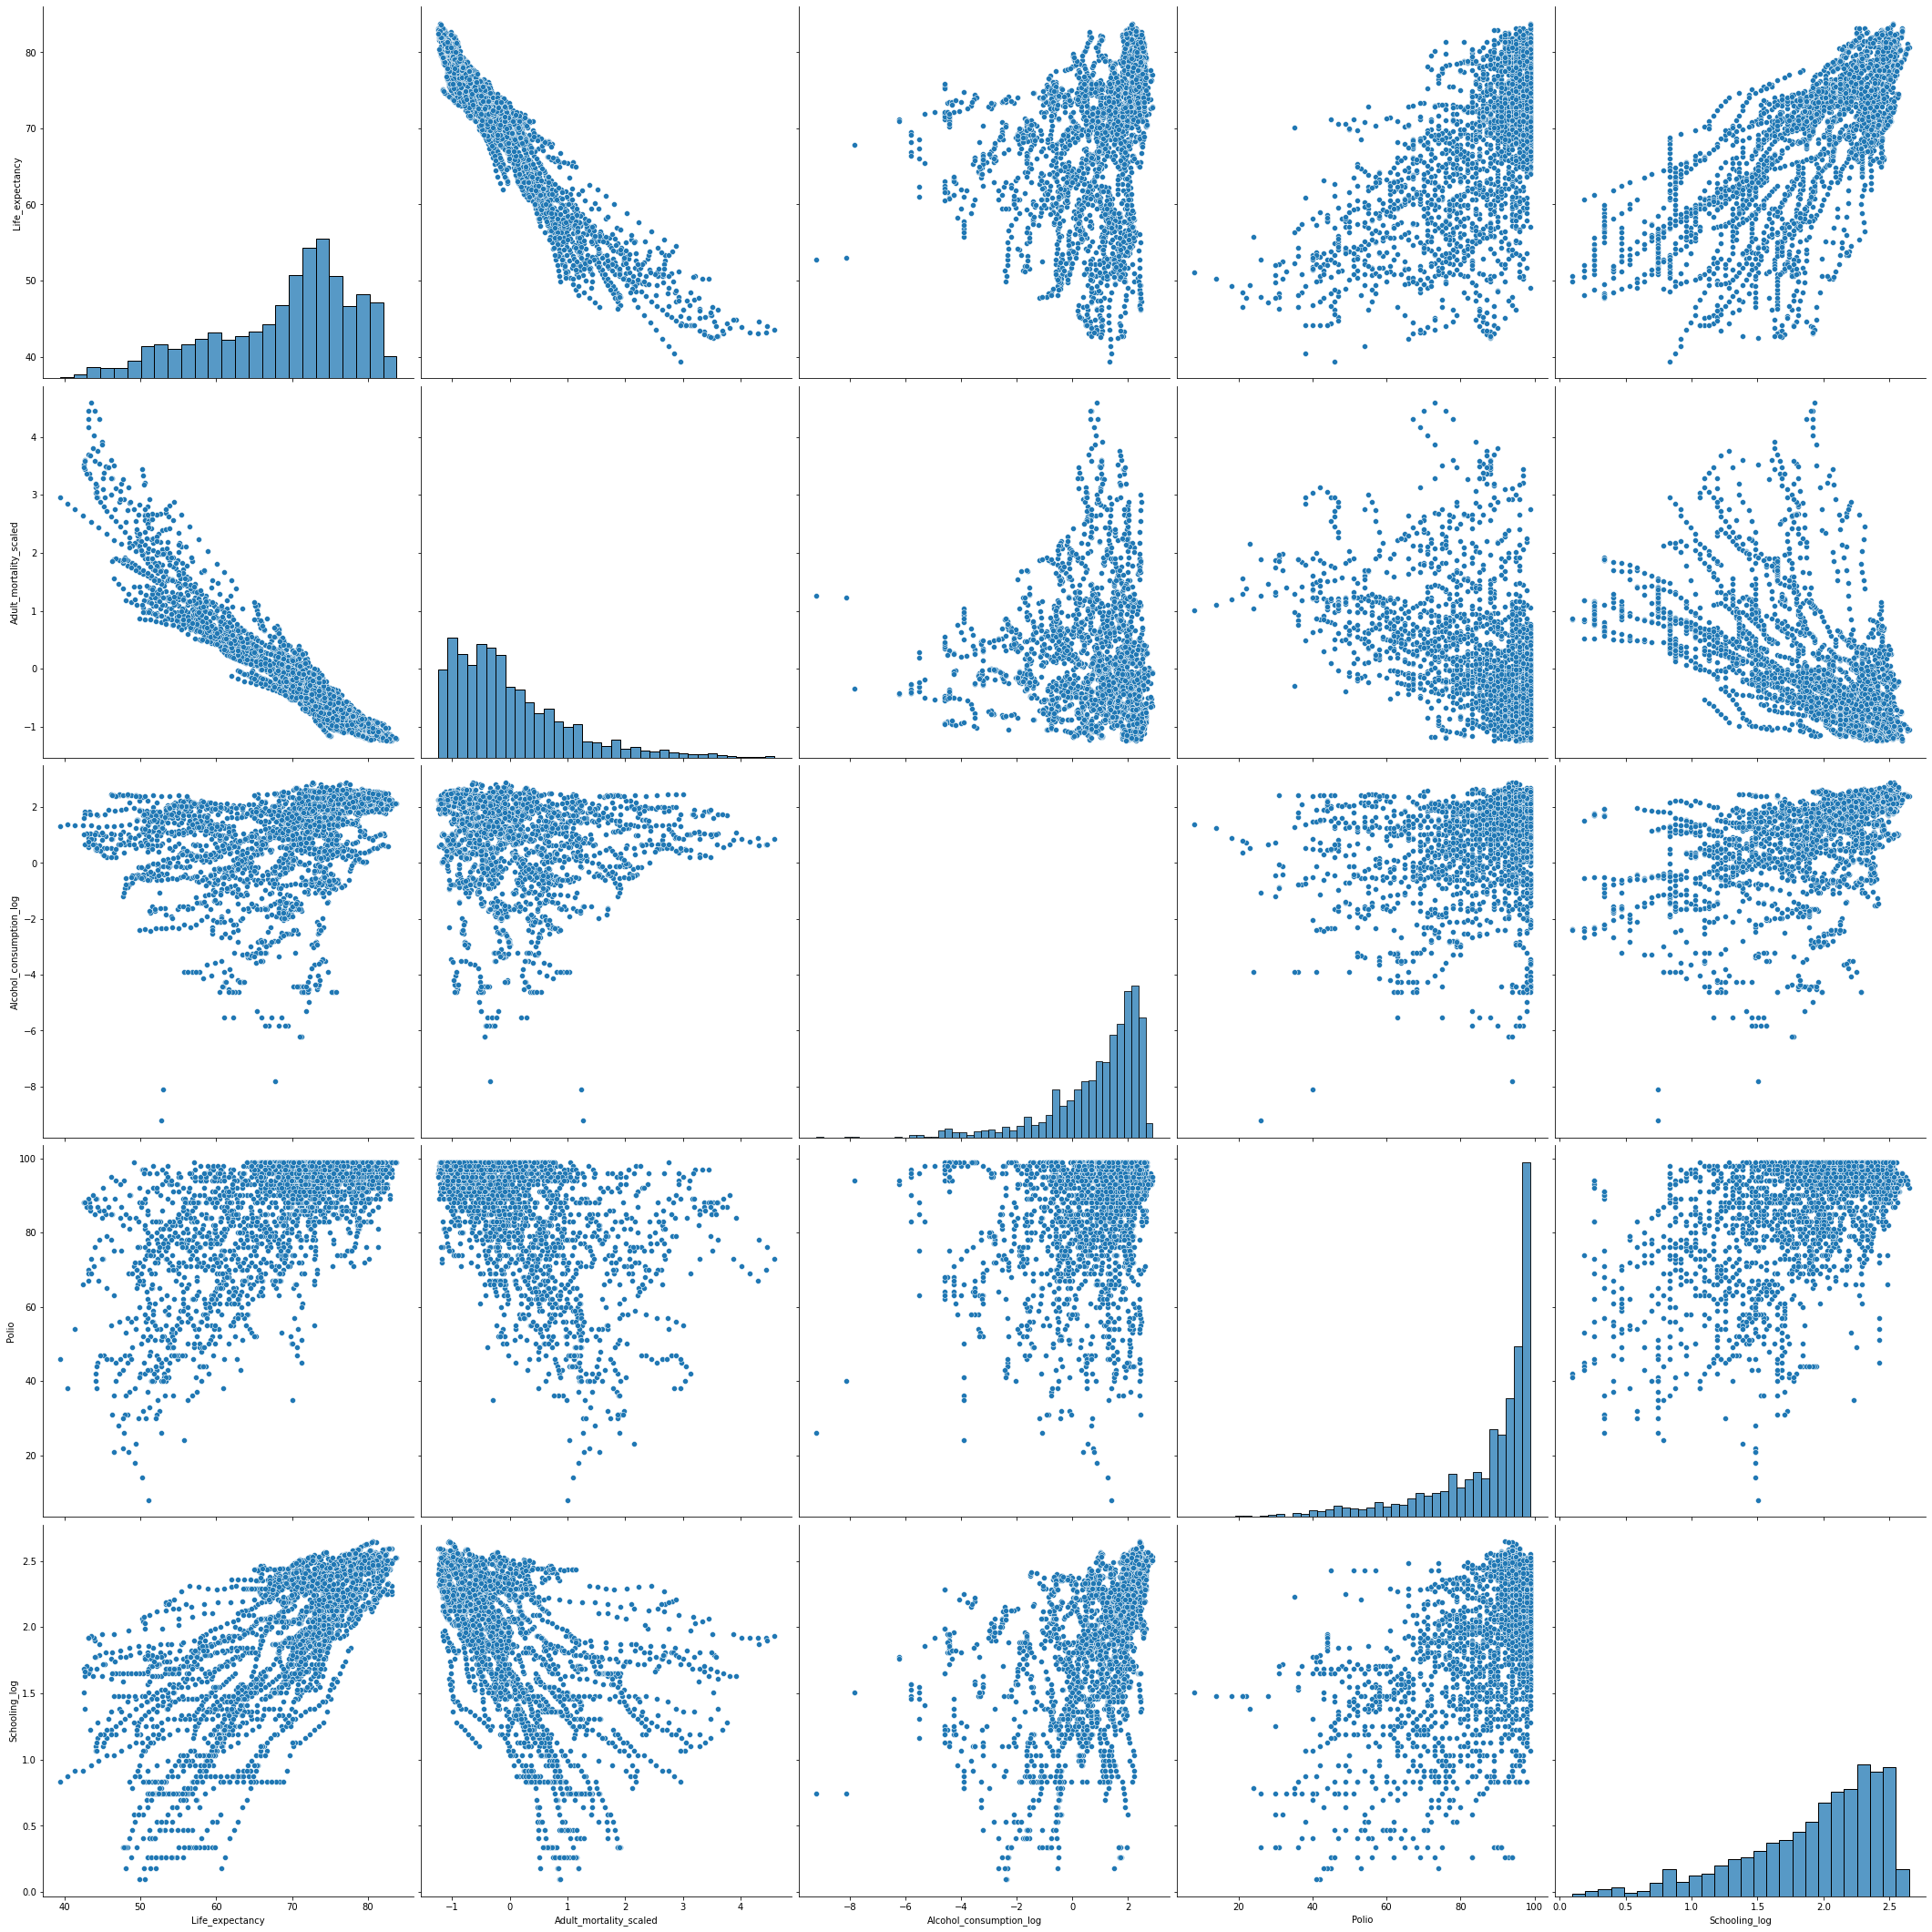

In [426]:
sns.pairplot(df[['Life_expectancy', 'Adult_mortality_scaled',# 'Infant_deaths',# 'Year',
        'Alcohol_consumption_log', 'Polio',# 'Hepatitis_B', #'Measles', 'Polio', 'Diphtheria',
        # 'GDP_per_capita', ,
       'Schooling_log' #'BMI', #'Thinness_five_nine_years', #'Population_mln',
       ]],
             height = 6)
plt.show()

In [198]:
X_train['GDP_log'] = np.log(X_train['GDP_per_capita'])
X_test['GDP_log'] = np.log(X_test['GDP_per_capita'])
X_train['Schooling_log'] = np.log(X_train['Schooling'])
X_test['Schooling_log'] = np.log(X_test['Schooling'])
X_train['BMI_log'] = np.log(X_train['BMI'])
X_test['BMI_log'] = np.log(X_test['BMI'])
# X_train['Alcohol_consumption_log'] = np.log(X_train['Alcohol_consumption'])
# X_test['Alcohol_consumption_log'] = np.log(X_test['Alcohol_consumption'])
# df['Alcohol_consumption_log'] = np.log(df['Alcohol_consumption'])

In [201]:
def feature_eng(df):
        df = df.copy() #Create a local copy
        df = sm.add_constant(df) #Add a constating, as we are using statsmodels
        return df

In [14]:
X_train = X_train.drop('Economy_status_Developed', axis = 1)

In [202]:
X_train = feature_eng(X_train)

In [524]:
X_train.columns

Index(['const', 'Country', 'Region', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developing',
       'Adult_mortality_scaled', 'Schooling_scaled', 'BMI_scaled', 'GDP_log',
       'BMI_log', 'Schooling_log'],
      dtype='object')

In [81]:
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = True):
    # The function is checking for p-values (whether features are statistically significant) - lower is better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text


        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [414]:
X_train.columns

Index(['const', 'Country', 'Region', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developing',
       'Adult_mortality_scaled', 'Schooling_scaled', 'GDP_log', 'BMI_log',
       'Schooling_log'],
      dtype='object')

In [90]:
stepwise_selection(X_train[feature_cols], y_train)

Add  const                          with p-value 0.0
Add  Under_five_deaths              with p-value 0.0
Add  Adult_mortality                with p-value 0.0
Add  Economy_status_Developing      with p-value 7.99343e-149
Add  GDP_per_capita                 with p-value 1.48913e-32
Add  Infant_deaths                  with p-value 1.08216e-19
Add  Alcohol_consumption            with p-value 1.09097e-12
Add  Schooling                      with p-value 1.24404e-06
Add  BMI                            with p-value 1.34595e-08
Add  Incidents_HIV                  with p-value 0.000676196
Add  Thinness_ten_nineteen_years    with p-value 0.000693701
Add  Year                           with p-value 0.00124432
Add  Hepatitis_B                    with p-value 0.000781336


['const',
 'Under_five_deaths',
 'Adult_mortality',
 'Economy_status_Developing',
 'GDP_per_capita',
 'Infant_deaths',
 'Alcohol_consumption',
 'Schooling',
 'BMI',
 'Incidents_HIV',
 'Thinness_ten_nineteen_years',
 'Year',
 'Hepatitis_B']

In [322]:
X_train.columns

Index(['const', 'Country', 'Region', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developing',
       'Adult_mortality_scaled', 'Schooling_scaled', 'GDP_log', 'BMI_log'],
      dtype='object')

In [489]:
X_train.columns

Index(['const', 'Country', 'Region', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developing',
       'Adult_mortality_scaled', 'Incidents_HIV_scaled',
       'Under_five_deaths_scaled', 'GDP_log', 'BMI_log', 'Schooling_log'],
      dtype='object')

In [498]:
df['BMI'].describe()

count    2864.000000
mean       25.032926
std         2.193905
min        19.800000
25%        23.200000
50%        25.500000
75%        26.400000
max        32.100000
Name: BMI, dtype: float64

# MODELING
reg model: 
- GDP logged, 
- Adult mortality standardised
- Polio
- Schooling logged
- Alcohol consumption
- BMI standardised

ethical model:
- GDP logged, 
- Adult mortality standardised
- Polio

### Standardisation:
```python 
df_scale = df[['Adult_mortality']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale) ## Fit the data
```
Transform the data according to the scaler
Save it as a new dataframe called df_scale_z
```python
df_scale_z = Z.transform(df_scale)

df_scaled_z = pd.DataFrame(df_scale_z, columns = ['Adult_mortality'])
df['Adult_mortality_scaled'] = df_scaled_z['Adult_mortality']

```

### Logging:

``` python
X_train['GDP_log'] = np.log(X_train['GDP_per_capita'])
X_test['GDP_log'] = np.log(X_test['GDP_per_capita'])
X_train['Schooling_log'] = np.log(X_train['Schooling'])
X_test['Schooling_log'] = np.log(X_test['Schooling'])
```

In [41]:
X_train['Adult_mortality_scaled'].isnull()

233     False
2427     True
2711     True
2061    False
2365     True
        ...  
2624     True
206     False
501     False
857     False
1962    False
Name: Adult_mortality_scaled, Length: 2291, dtype: bool

In [42]:
X_train[X_train.index == 2427]

,const,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Adult_mortality_scaled,GDP_log,Schooling_log
2427,1.0,Malta,European Union,2004,6.2,7.1,60.357,6.61,85,31,...,17653,0.4,0.7,0.7,8.6,1,0,NaN,9.778661,2.151762


In [223]:
X_train['Adult_mortality'].describe()


count    2291.000000
mean      192.774636
std       114.557698
min        49.384000
25%       108.337000
50%       164.684500
75%       249.259000
max       719.360500
Name: Adult_mortality, dtype: float64

In [217]:
feature_cols = ['const', 'GDP_log', 'Adult_mortality_scaled', 'Polio_scaled', 'Schooling_log', 'Alcohol_consumption_scaled', 'Hepatitis_B_scaled', 'Economy_status_Developing', 'Under_five_deaths_scaled', 'BMI_log']
feature_cols_e = ['const', 'GDP_log', 'Adult_mortality_scaled', 'Polio_scaled', 'Hepatitis_B_scaled', 'Economy_status_Developing', 'Under_five_deaths_scaled']

## Create and train an OLS linear regression
lin_reg = sm.OLS(y_train, X_train[feature_cols_e]) # Creating model
results = lin_reg.fit() # Fit model and store/save it
results.summary() # Print the results

#R2 .979
#Cond.no. 9.08e+06 3.39e+05
#RMSE 1.3651109611120074 min 1.336 1.379525289857415


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        12:54:41   Log-Likelihood:                -4021.9
No. Observations:                2291   AIC:                             8058.
Df Residuals:                    2284   BIC:                             8098.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        65.4562      0.361    181.171      0.000      64.748      66.165
GDP_log                       0.5508      0.037     14.738      0.000       0.478       0.624
Adult_mortality_scaled       -5.1487      0.050   -102.399      0.000      -5.247      -5.050
Polio_scaled                  0.1876      0.055      3.411      0.001       0.080       0.295
Hepatitis_B_scaled           -0.1394      0.043     -3.275      0.001      -0.223      -0.056
Economy_status_Developing    -1.6327      0.097    -16.851      0.000      -1.823      -1.443
Under_five_deaths_scaled     -3.5828      0.071    -50.203      0.000      -3.723      -3.443
==============================================================================
Omnibus:                       27.119   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.851
Skew:                           0.049   Prob(JB):                     1.82e-10
Kurtosis:                       3.678   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X_train['Adult_mortality_scaled'].describe()

count    2291.000000
mean        0.004551
std         0.997106
min        -1.243516
25%        -0.730391
50%        -0.239944
75%         0.496189
max         4.587934
Name: Adult_mortality_scaled, dtype: float64

In [134]:
df[df.index == 100]

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
100,"Gambia, The",Africa,2009,47.1,76.8,277.4475,3.05,97,64,23.3,...,98,1.29,733,1.74,8.4,8.3,2.7,0,1,59.3


In [214]:
y_pred = results.predict(X_train[feature_cols])

# Get the RMSE of the model: y_train (real) against y_pred (predicted)
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

1.3703857687976668


In [207]:
X_test = feature_eng(X_test)

In [215]:
y_test_pred = results.predict(X_test[feature_cols])

# Get the RMSE of the model applied to the testing set
rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse_test)

1.3689575067429975


In [176]:
cols = ['const', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Adult_mortality_scaled', 'Schooling_scaled', 'BMI_scaled', 'GDP_log',
       'BMI_log', 'Schooling_log']
## We can create an indexed list (a series) where we list the VIF of each of the columns. Note the use of '.shape' in the second part of the loop
pd.Series([variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])], index = X_train[cols].columns)


/Users/egleduobaite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/egleduobaite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/egleduobaite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/egleduobaite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/egleduobaite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squ

const                            0.000000
Year                             1.093431
Infant_deaths                   56.860738
Under_five_deaths               61.599063
Adult_mortality                       inf
Alcohol_consumption              2.544649
Hepatitis_B                      2.565294
Measles                          1.717612
BMI                                   inf
Polio                           12.478130
Diphtheria                      13.496841
Incidents_HIV                    3.318165
GDP_per_capita                   4.829327
Population_mln                   1.220061
Thinness_ten_nineteen_years     10.086522
Thinness_five_nine_years        10.198565
Schooling                             inf
Economy_status_Developing        3.176423
Adult_mortality_scaled                inf
Schooling_scaled                      inf
BMI_scaled                            inf
GDP_log                         10.461608
BMI_log                        447.774098
Schooling_log                   28

In [177]:
## This a piece of code from stats.stackexchange.com
from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the (VIF)

## It runs the model with all the variables.
## If any of them have a higher VIF than 5, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [171]:
X_train.columns

Index(['const', 'Country', 'Region', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developing',
       'Adult_mortality_scaled', 'Schooling_scaled', 'BMI_scaled', 'GDP_log',
       'BMI_log', 'Schooling_log'],
      dtype='object')

In [178]:
cols = ['const', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developing',
       'Adult_mortality_scaled', 'Schooling_scaled', 'BMI_scaled', 'GDP_log', 'Schooling_log']

In [180]:
calculate_vif(X_train[cols])

/Users/egleduobaite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/egleduobaite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'Adult_mortality' at index: 4
dropping 'BMI' at index: 7
dropping 'Schooling' at index: 14
dropping 'const' at index: 0
dropping 'Year' at index: 0
dropping 'Diphtheria' at index: 6
dropping 'Schooling_log' at index: 16
dropping 'GDP_log' at index: 15
dropping 'Infant_deaths' at index: 0
dropping 'Polio' at index: 4
dropping 'Hepatitis_B' at index: 2
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'Measles' at index: 2
dropping 'Under_five_deaths' at index: 0
Remaining variables:
Index(['Alcohol_consumption', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_five_nine_years',
       'Economy_status_Developing', 'Adult_mortality_scaled',
       'Schooling_scaled', 'BMI_scaled'],
      dtype='object')


,Alcohol_consumption,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_five_nine_years,Economy_status_Developing,Adult_mortality_scaled,Schooling_scaled,BMI_scaled
233,1.840,0.17,3961,0.19,0.1,1,-0.654075,0.841336,3.085027
2427,6.610,0.08,17653,0.40,0.7,0,-1.148007,0.305228,0.896765
2711,10.110,0.23,11451,2.06,2.3,0,-0.183773,1.566659,0.577644
2061,1.410,0.17,8110,0.33,14.5,1,-0.917761,-1.271561,-0.470898
2365,10.010,0.08,42488,62.77,0.5,0,-1.026835,1.755873,0.896765
...,...,...,...,...,...,...,...,...,...
2624,2.950,0.09,1293,1250.29,27.7,1,-0.033243,-0.703917,-1.656207
206,4.960,0.06,2611,97.21,9.7,1,0.107644,0.462906,-0.972375
501,9.060,0.08,7878,38.20,2.6,0,-0.442377,1.219765,0.258522
857,6.260,18.94,3060,1.04,7.1,1,3.451345,-0.798525,0.440877
